In [ ]:
# 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/2021 CCP/천신만고 끝에 얻은 데이터/KT 데이터 재구성/place_cut/201905/201905KT_Jegi.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
# df의 데이터 개수
len(df)

328169

In [ ]:
# 모든 셀의 개수
id_list = df['id'].unique()
len(id_list)

459

In [ ]:
x_list = df['x'].unique()
y_list = df['y'].unique()

In [ ]:
cells = pd.DataFrame(columns=['id','x','y'])
cells['id'] = id_list
cells['x'] = x_list
cells['y'] = y_list

In [ ]:
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Polygon

In [ ]:
# 경도 1도 = 88.8km (위도 37도 기준)
# 위도 1도 = 111km
# 경도 → 25/88800, 위도 → 25/111000

x_ = 25/88800
y_ = 25/111000

rec_cells = cells.copy()
rec_cells['geometry'] = rec_cells.apply(lambda row : Polygon([(row['y']+y_,row['x']+x_),(row['y']+y_,row['x']-x_),(row['y']-y_,row['x']-x_),(row['y']-y_,row['x']+x_)]), axis=1)
rec_cells = gpd.GeoDataFrame(rec_cells, geometry='geometry')

k = [list(rec_cells.geometry.exterior[row_id].coords) for row_id in range(rec_cells.shape[0])]

In [ ]:
import folium

m = folium.Map(location=[37.583772, 127.037004], zoom_start=15)

for i in range(len(rec_cells)):
  folium.Polygon(locations = k[i],fill = True,tooltip = rec_cells['id'][i]).add_to(m)
  folium.CircleMarker([rec_cells['y'][i],rec_cells['x'][i]],color='red',radius = 1, tooltip=rec_cells['id'][i]).add_to(m)

m

In [ ]:
# 이상적인 df의 데이터 개수
# 셀 개수 * 24시간 * 31일
459*24*365

4020840

In [ ]:
# 빈 공간 -> 모든 셀 중 값이 없는 셀이 있기 때문이라고 생각
# 아래 코드를 통해 해서 셀의 개수가 일정하지 않음을 확인함

for i in range(30):
  sample = df[df['etl_ymd'] == 20190501+i]
  for j in range(24):
    res = sample[sample['timezn_cd'] == j]
    print(i,'일 ',j,'시 :',len(res['id'].unique()))

In [ ]:
# 일별 특정 셀의 데이터 개수 확인 (24개가 정상)
df_1 = df[df['etl_ymd']==20190501]  # 날짜
df_1_id = df_1[df_1['id']==id_list[0]]  # id
df_1_id = df_1_id.reset_index(drop=True)
df_1_id

In [ ]:
# folium geojson 지도 나타내기
# https://mjs1995.tistory.com/169?category=802136

In [ ]:
# 피복 구성 파악을 위해 사진 자르기 + 셀과 매칭

In [ ]:
import numpy as np

In [ ]:
cell_id = df['id'].unique()
# 글씨에 가려져서 삭제한 셀 : 51947242 51947241 51935052 51935053 51922863 51910674
remove_id = [51947241, 51947242, 51935052, 51935053, 51922863, 51910674]
cell_id = np.setdiff1d(cell_id, remove_id)
cell_id.sort()

In [ ]:
image_list = []

In [ ]:
from PIL import Image, ImageDraw
import numpy as np
ans = [[              7,8,9,10                                                      ],
       [              7,8,9,10,11                                                   ],
       [              7,8,9,10,11,12                                                ],
       [              7,8,9,10,11,12,13,14                                          ],
       [        4,5,6,7,8,9,10,11,12,13,14,15                                       ],
       [    2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17                                 ],
       [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18                              ],
       [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19                           ],
       [      3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20                        ],
       [0,1,2,3,4,      8,9,10,11,12,13,14,15,16,17,18,19,20,21                     ],
       [0,1,2,3,4,5,6,7,8,9,10,         14,15,16,17,18,19,20,21,22                  ],
       [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,   17,18,19,20,21,22,23,24            ],
       [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,         21,22,23,24,25,26,27,28],
       [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,      22,23,24,25,26,27,28],
       [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,      22,   24,25,26,27,28],
       [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,      22,23,24,      27,28],
       [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27   ],
       [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28],
       [  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,   28],
       [  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,   20,            25,26,   28],
       [  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18                              ],
       [    2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18                              ],
       [    2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18                              ],
       [      3,4,5,6,7,8,9,10,11,12,13,14,15                                       ],
       [      3,      7,8,9,10,11                                                   ],
       [              7                                                             ]]

def crop_image(hor, ver, left, up, right, down, ori_image):
  if ver in ans[hor]:
    image_list.append(np.array(ori_image.crop((left,up,right,down))))
  

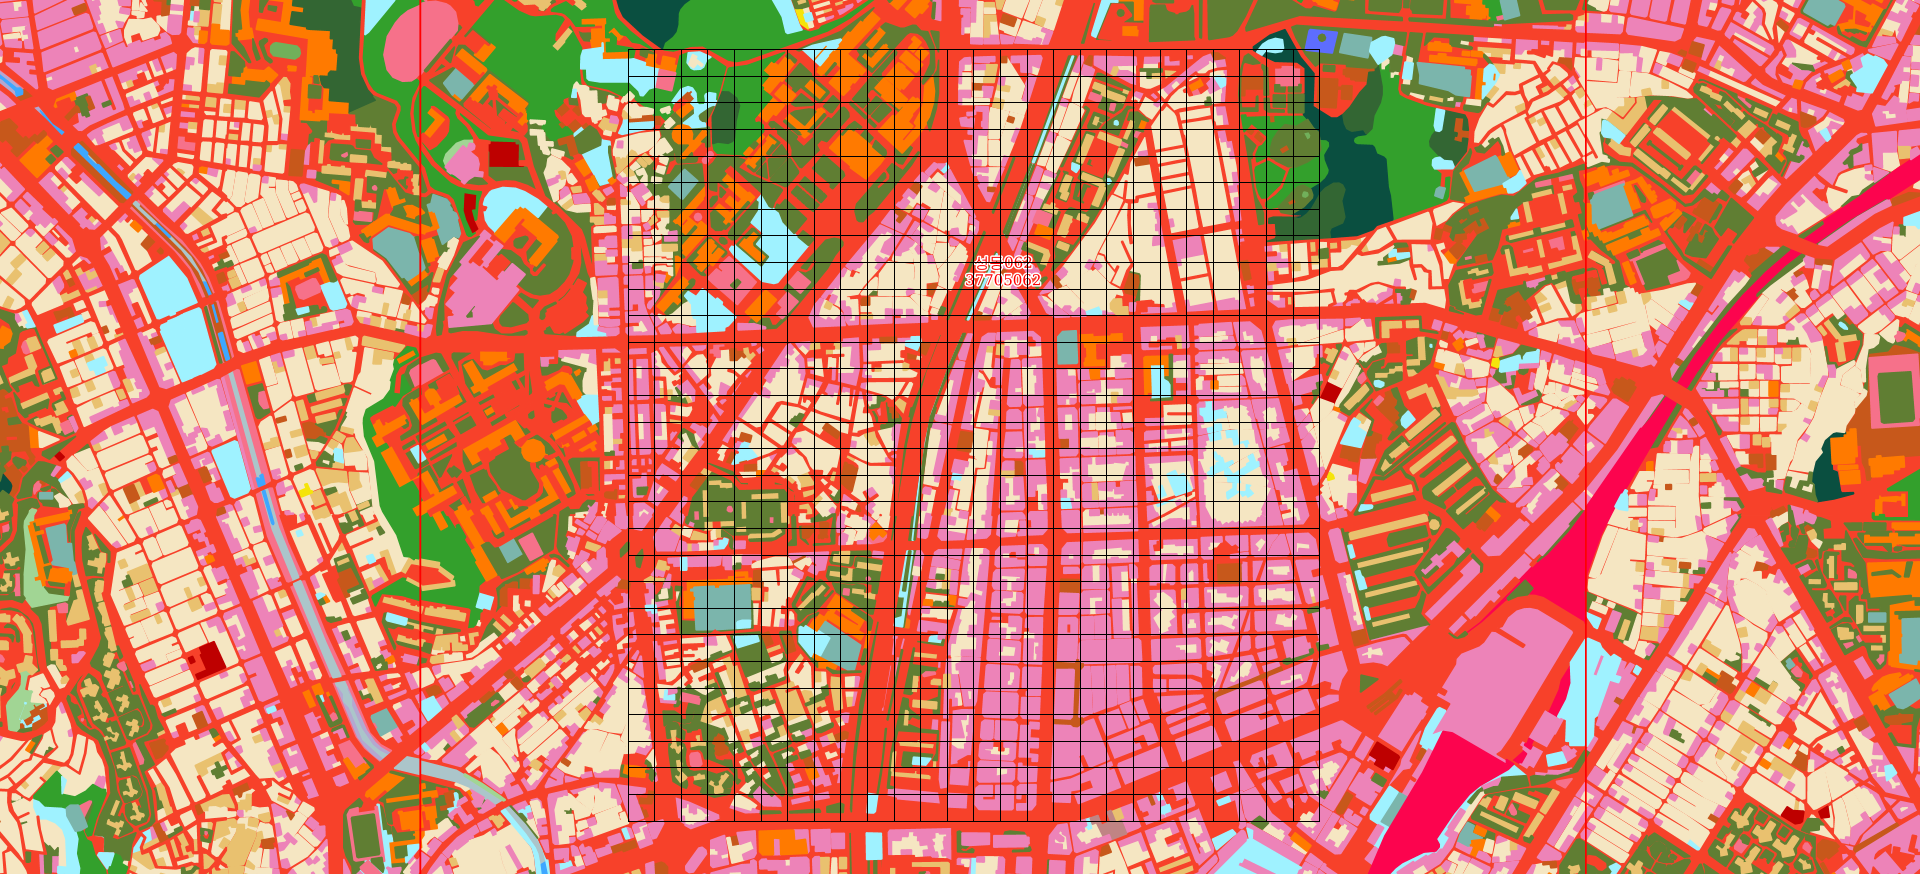

In [ ]:
ori_image = Image.open('/content/drive/MyDrive/Colab Notebooks/2021CCP/kt_data/SG05/jegi.png')
image = Image.open('/content/drive/MyDrive/Colab Notebooks/2021CCP/kt_data/SG05/jegi.png')
draw = ImageDraw.Draw(image)
length = 26.6
left = 628
up = 821
for hor in range(26):
  for ver in range(29):
    x0, x1, y0, y1 = (hor+0)*length, (hor+1)*length, (ver+0)*length, (ver+1)*length
    draw.line([(left+x0,up-y0), (left+x1,up-y0), (left+x1,up-y1), (left+x0,up-y1), (left+x0,up-y0)], fill="black", width=1)
    crop_image(hor, ver, left+x0, up-y1, left+x1, up-y0, ori_image)

image

In [ ]:
cutted = Image.fromarray(image_list[0])
cutted

In [ ]:
cell_id[0]

51764393

In [ ]:
# (R,G,B)
# 주거시설(단독주거시설, 공동주거시설)                    (254,230,194) (233,193,111)
# 상업시설(상업•업무시설, 혼합지역)                       (237,131,184) (223,176,164)
# 휴양시설(문화•체육•휴양시설)                            (246,113,138)
# 학교(교육•행정시설)                                     (255,122,0)
# 교통(철도, 도로)                                        (252,4,78) (247,65,42)
# 공공시설(기타교통•통신시설, 환경기초시설, 기타공공시설) (190,0,0) (246,117,18) (199,88,27)
# 하천(하천, 호소)                                        (62,167,255) (93,109,255)
# 산림(활엽수림, 침엽수림, 혼효림)                        (51,160,44) (10,79,64) (51,102,51)
# 초지(자연초지, 기타초지)                                (161,213,148) (96,126,51)
# 나지(운동장, 기타나지)                                  (123,181,172) (159,242,255)

In [ ]:
bgr_list = [[[194,230,254],[111,193,233]],
            [[184,131,237],[164,176,223]],
            [[138,113,246]],
            [[0,122,255]],
            [[78,4,252],[42,65,247]],
            [[0,0,190],[18,117,246],[27,88,199]],
            [[255,167,62],[255,109,93]],
            [[44,106,51],[64,79,10],[51,102,51]],
            [[148,213,161],[51,126,96]],
            [[172,181,123],[255,242,159]]]

In [ ]:
import cv2
import numpy as np

percent_res = np.zeros([len(image_list),10])

for k in range(len(image_list)):

  # PIL to OpenCV
  cutted = Image.fromarray(image_list[k])
  cutted = np.array(cutted)
  cutted = cv2.cvtColor(cutted, cv2.COLOR_BGR2RGB)
  #cutted = cutted.reshape((cutted.shape[0] * cutted.shape[1], 3))

  # BGR로 특정 색을 추출하는 함수
  def bgrExtraction(image, bgrLower, bgrUpper):
    img_mask = cv2.inRange(image, bgrLower, bgrUpper)
    result = cv2.bitwise_and(image, image, mask=img_mask)
    return result

  for i in range(10):
    for j in range(len(bgr_list[i])):

      # BGR로 색추출
      bgrLower = np.array(bgr_list[i][j]) # 추출할 색의 하한
      bgrUpper = np.array(bgr_list[i][j]) # 추출할 색의 상한
      bgrResult = bgrExtraction(cutted, bgrLower, bgrUpper)

      # 면적(개수) 계산
      temp1 = np.count_nonzero(bgrResult, axis=-1)
      temp2 = np.where(temp1>0,1,0)
      percent_res[k][i] += temp2.sum()

In [ ]:
# normalized ver (27*27 is image size)
#percent_res = (percent_res.transpose() / percent_res.sum(axis=1)).transpose() * 27 * 27
percent_res = percent_res / (27 * 27)
percent_res_2 = percent_res ** 2
percent_res_3 = percent_res ** 3
percent_res_10 = percent_res ** 10
percent_res_40 = percent_res ** 40

In [ ]:
#percent_res

In [ ]:
# cell_id, percent_res matching with id, total

In [ ]:
df95 = pd.read_csv('/content/drive/Shareddrives/2021 CCP/천신만고 끝에 얻은 데이터/KT 데이터 재구성/place_cut/201905/201905KT_Jegi.csv')
df95 = df95.drop(['Unnamed: 0'], axis=1)
df97 = pd.read_csv('/content/drive/Shareddrives/2021 CCP/천신만고 끝에 얻은 데이터/KT 데이터 재구성/place_cut/201907/201907KT_Jegi.csv')
df97 = df97.drop(['Unnamed: 0'], axis=1)
df05 = pd.read_csv('/content/drive/Shareddrives/2021 CCP/천신만고 끝에 얻은 데이터/KT 데이터 재구성/place_cut/202005/202005KT_Jegi.csv')
df05 = df05.drop(['Unnamed: 0'], axis=1)
df07 = pd.read_csv('/content/drive/Shareddrives/2021 CCP/천신만고 끝에 얻은 데이터/KT 데이터 재구성/place_cut/202007/202007KT_Jegi.csv')
df07 = df07.drop(['Unnamed: 0'], axis=1)
df15 = pd.read_csv('/content/drive/Shareddrives/2021 CCP/천신만고 끝에 얻은 데이터/KT 데이터 재구성/place_cut/202105/202105KT_Jegi.csv')
df15 = df15.drop(['Unnamed: 0'], axis=1)
df17 = pd.read_csv('/content/drive/Shareddrives/2021 CCP/천신만고 끝에 얻은 데이터/KT 데이터 재구성/place_cut/202107/202107KT_Jegi.csv')
df17 = df17.drop(['Unnamed: 0'], axis=1)

In [ ]:
cell_id = cell_id.tolist()

In [ ]:
percent_res = percent_res.tolist()
percent_res_2 = percent_res_2.tolist()
percent_res_3 = percent_res_3.tolist()
percent_res_10 = percent_res_10.tolist()
percent_res_40 = percent_res_40.tolist()

In [ ]:
# percent_res[cell_id.index(df95['id'][0])]

[0.0,
 0.18655692729766804,
 0.0,
 0.0,
 0.6213991769547325,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0438957475994513]

In [ ]:
df_total = pd.concat([df95,df97,df05,df07,df15,df17])
df_total = df_total[['id','total']]

remove_id = [51947241, 51947242, 51935052, 51935053, 51922863, 51910674]  # 설명은 위에 있음
index1 = df_total[(df_total['id']==remove_id[0])|(df_total['id']==remove_id[1])|(df_total['id']==remove_id[2])|(df_total['id']==remove_id[3])|(df_total['id']==remove_id[4])|(df_total['id']==remove_id[5])].index
df_total = df_total.drop(index1)

y_train = df_total['total'].tolist()

y_id = df_total['id'].tolist()

x_train = []
x_train_2 = []
x_train_3 = []
x_train_10 = []
x_train_40 = []
for i in range(len(y_id)):
  x_train.append(percent_res[cell_id.index(y_id[i])])
  x_train_2.append(percent_res_2[cell_id.index(y_id[i])])
  x_train_3.append(percent_res_3[cell_id.index(y_id[i])])
  x_train_10.append(percent_res_10[cell_id.index(y_id[i])])
  x_train_40.append(percent_res_40[cell_id.index(y_id[i])])

In [ ]:
print(len(x_train))
print(len(y_train))

1836045
1836045


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

model_2 = LinearRegression()
model_2.fit(x_train_2, y_train)
model_3 = LinearRegression()
model_3.fit(x_train_3, y_train)
model_10 = LinearRegression()
model_10.fit(x_train_10, y_train)
model_40 = LinearRegression()
model_40.fit(x_train_40, y_train)

LinearRegression()

In [ ]:
# y = m1x1 + m2x2 + ... + m10x10 + b
# 주거 상업 휴양 학교 교통 공공 하천 산림 초지 나지
print(model.coef_)  # 회귀계수(m)
print(model.intercept_)  # 상수(b) -> 0에 가까워야 함

print()
print(model_2.coef_)
print(model_2.intercept_)
print(model_3.coef_)
print(model_3.intercept_)
print(model_10.coef_)
print(model_10.intercept_)
print(model_40.coef_)
print(model_40.intercept_)

[ 9.33634641e+00 -1.29029199e+01  1.46881054e+01 -7.78535967e+00
 -8.59396583e-01 -2.05496450e+00 -4.44089210e-16  0.00000000e+00
 -8.05613916e+00 -4.10763925e+01]
28.12855268461152

[ 4.64740724e+01 -1.32554294e+01  2.09101857e+02 -3.12424042e+01
 -2.73134395e+00  1.86790856e+01  1.42108547e-14  0.00000000e+00
 -1.14015259e+01 -4.85458445e+01]
25.62667137352419
[ 8.18903911e+01 -1.43326337e+01  9.37686148e+02 -5.77347105e+01
 -3.11717392e+00  5.57705091e+01  1.13686838e-13  0.00000000e+00
 -1.38397473e+01 -5.47279199e+01]
24.724147107736346
[ 2.54885783e+03 -1.86201793e+01  1.33395235e+07 -5.64980631e+03
 -3.92373966e+00  5.46693620e+03  3.79726771e-07 -1.86264515e-09
 -7.78300356e+01 -2.10831674e+02]
23.679375828309283
[ 5.54050772e+10 -7.36377724e+01  2.16634853e+04 -1.12671046e+13
  1.66026576e+03  3.94853831e+11 -1.95312500e-03  0.00000000e+00
 -8.67179935e+04 -1.37343903e+05]
23.556420023765984


In [ ]:
# 제기동 카페에 적용

In [ ]:
# data_view_2에서 계속